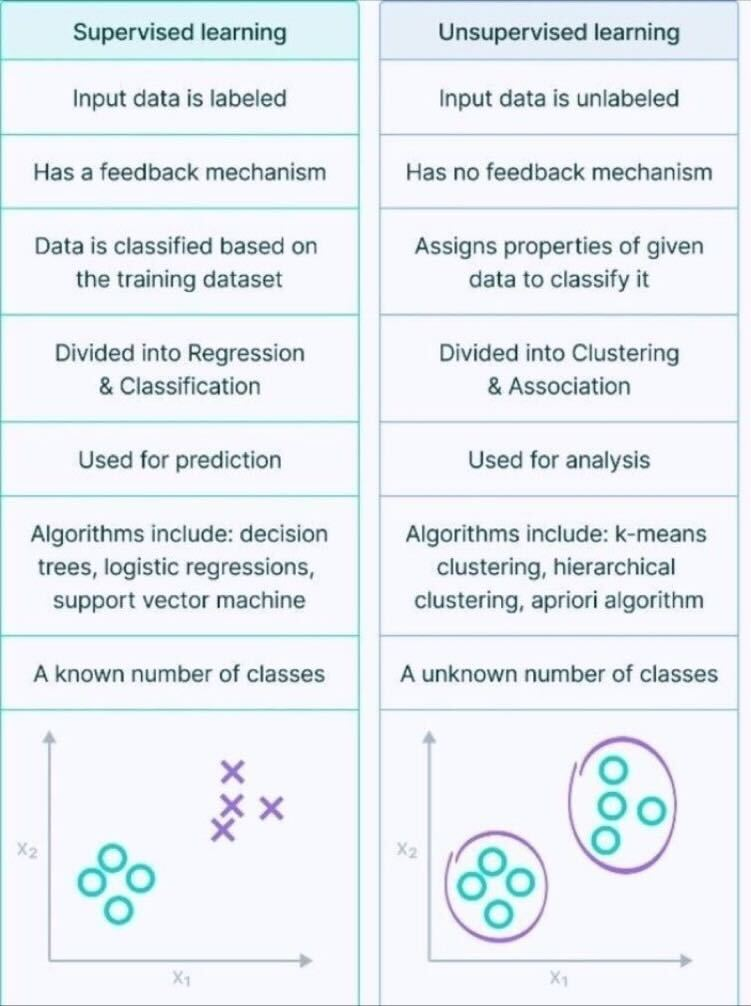

##### Supervised Learning: 
* Elimizdeki featurelara karşılık çıktığı yanıt bağımlı değişken olduğunda denetimli öğrenme(supervised learning) denir.  
#### Unsupervised Learning: 
* Elimizdeki features da bağımlı değişken,target yok ise buna denetimsiz öğrenme(unsupervised learning) denir. (label yok ise) 

## Unsupervised Learning : 

* K-Ortalamalar (K-Means) 
* Hiyerarşik Kümeleme Analizi (Hierarchical Cluster Analysis) 
* Temel Bileşen Analizi (Principal Component Analysis)

##### K-Ortalamalar (K-Means)  
* Amaç gözlemleri birbirlerine olan benzerliklerine uygun kümelere ayırmaktır. 
* Sınıflandırma probleminden farkı elimizde sınıflar yok , o yüzden benzerliklerine göre kümeler
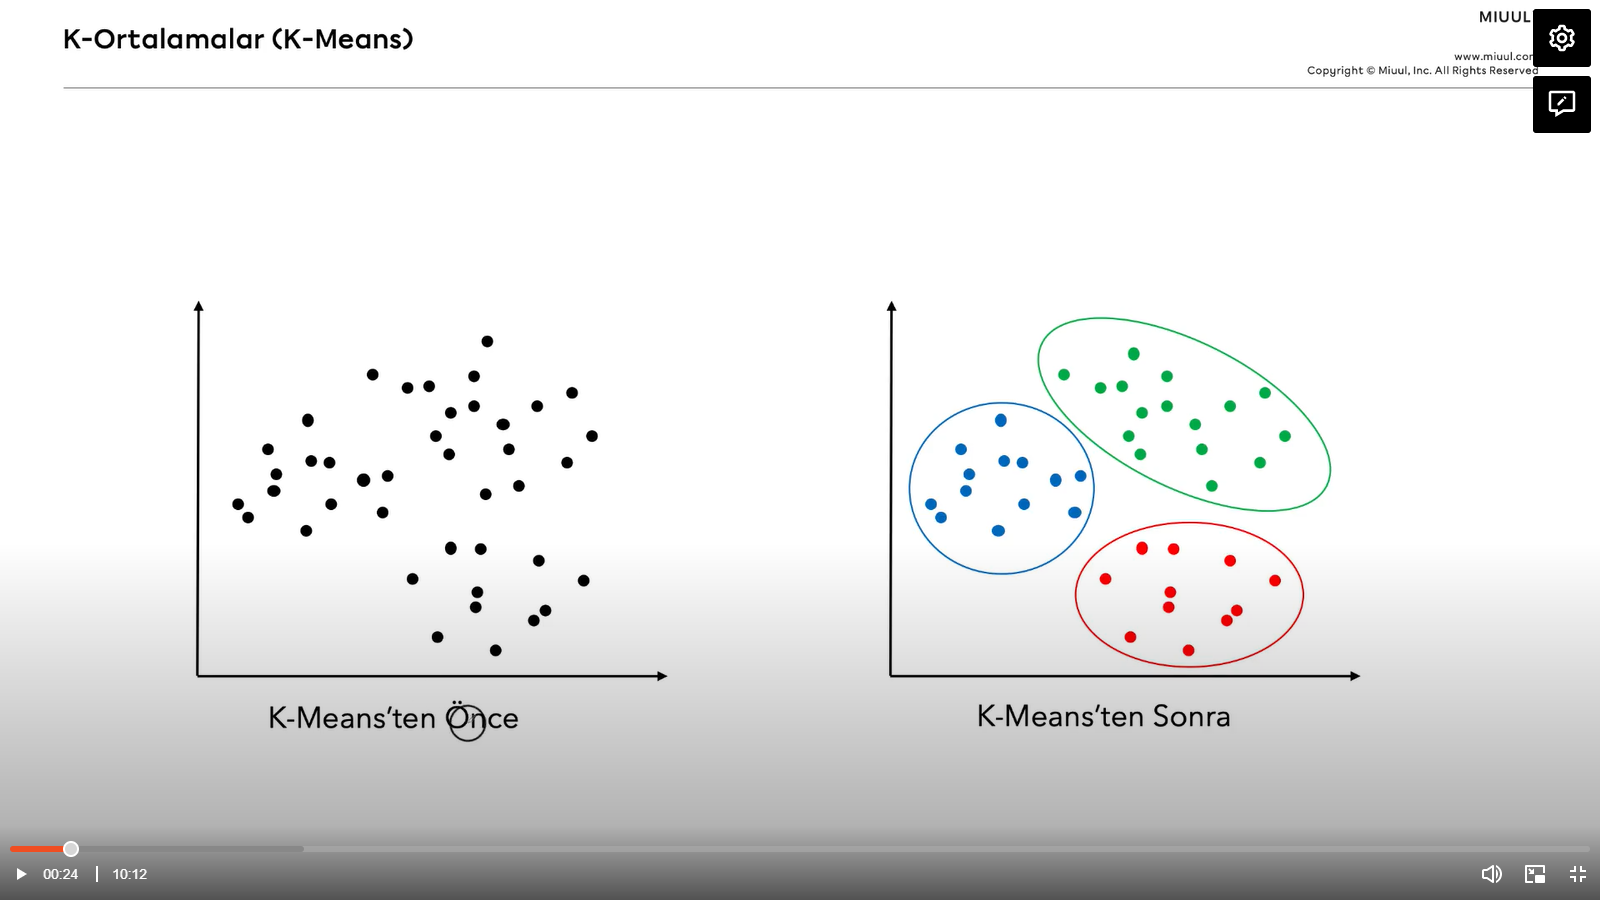

* Adım 1: Küme sayısı belirlenir 
* Adım 2: Rastgele k merkez seçilir 
* Adım 3: Her gözlem için k merkezlere uzaklıklar hesaplanır 
* Adım 4: Her gözlem en yakın olduğu merkezlere yani kümeye atanır.En yakın merkeze atanır. 
* Adım 5: Atama işlemlerinden sonra oluşan kümeler için tekrar merkez hesaplamaları yapılır. 
* Adım 6: Bu işlem belirlenen bir iterasyon adedince tekrar edilir ve küme içi hata kareler toplamlarının toplamının(total within-cluster variation) minimum olduğu durumdaki gözlemlerin kümelenme yapısı nihai kümelenme olarak seçilir.

Kümeler ve Merkezler var kendi içinde homojen birbirlerine göre heterojen olsun,peki nasıl yapacağım ? 
* SSE or SSR or SSD
* Merkez gözlem biriminin değerleri ile  ve etrafındakilerinin gözlem birimini farklarının karelerini alıp topladığımızda -> bu kümenin kendi içindeki hata karesini buluruz. 
* SSE lerin hepsini toplarsak -> toplam hata karaler değerleri SSE 
* SSE en düşük olmalı yoksa değiştiririz , yeniden deneriz ve en düşük olana kadar deneriz.
* Özetle ; kümeler içerisindeki homojenli yüksek yapmak yani benzerlikleri yüksek yapmak ,farkları küçük olmalı  

In [1]:
!pip install yellowbrick

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import MinMaxScaler 
from yellowbrick.cluster import KElbowVisualizer 
from scipy.cluster.hierarchy import linkage 
from scipy.cluster.hierarchy import dendrogram 
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA

#### K - Means 
öyle bir işlem yapayım ki bunların hepsi gruplansın,clustering

eyaletleri suç istatistiklerine göre sırala diyebilir 

In [4]:

df =pd.read_csv("C:/Users/tolga/OneDrive/Masaüstü/ML_YAZ_KAMPI/Machine Learning/ML part 2/datasets/USArrests.csv" , index_col=0)

In [5]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [6]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


numeric değerler arasındaki çok fark yoksa "outlier" değer yok tahmini yapabiliriz

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


In [9]:
# standartlaştırma 
sc = MinMaxScaler((0,1)) 
df = sc.fit_transform(df) 
df[0:5]

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512]])

In [10]:
# k-means modeli kuralım 
# bağımsız değişkenimiz df
kmeans = KMeans(n_clusters=4).fit(df) 
kmeans.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 10,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [11]:
 # aynı sonucu almak için "random_state" kullanmalıyız. 
kmeans = KMeans(n_clusters=4,random_state=17).fit(df)  
kmeans.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 10,
 'random_state': 17,
 'tol': 0.0001,
 'verbose': 0}

In [12]:
# küme_sayısı -> n_cluster 
kmeans.n_clusters

4

In [13]:
# cluster merkezleri için
kmeans.cluster_centers_

array([[0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.30439405, 0.32937147, 0.70588235, 0.31098951],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408]])

In [14]:
# ssd sse hesaplamasının karşılığı;  
# sum of squared distances of samples to their closest cluster center.
kmeans.inertia_

3.683456153585913

##### Optimum Küme Sayısının Belirlenmesi

cluster'a 4 yazdım ama daha farklı olabilir ve benim ssd sonucumu etkileyebilir dolayısıyla aşağıdaki işlemi uygulamam gerekiyor

In [15]:
kmeans = KMeans() 

In [16]:
ssd = []

In [17]:
K = range(1,30)

In [18]:
for k in K :  
    kmeans = KMeans(n_clusters=k).fit(df) 
    ssd.append(kmeans.inertia_)

C:\Users\tolga\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


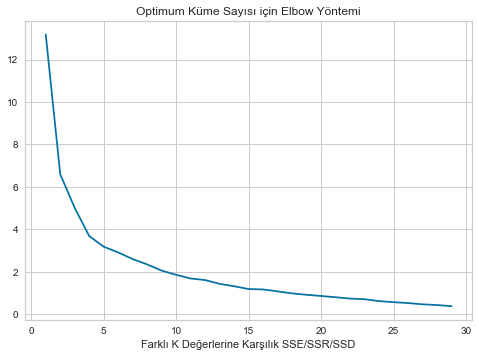

In [19]:
plt.plot(K, ssd, "bx-") 
plt.xlabel("Farklı K Değerlerine Karşılık SSE/SSR/SSD") 
plt.title("Optimum Küme Sayısı için Elbow Yöntemi") 
plt.show()

sonuç : küme sayısı arttıkça sse değerleri düşmüştür 
* gözlem birimi kadar cluster olursa sonuç 0 olur çünkü tüm gözlem birimleri clusterdır  
* direkt küme sayısına bakarak tahmin yapılamaz   
* merkez sayısı bize karar verme yolu buluruz 
* anlamlı kümeleme olması lazım doğu anadolu ilinde mersinin olması gibi anlamsız noktaları keşfet ve ona göre karar ver

2. yöntem 
* Elbow Yöntemi

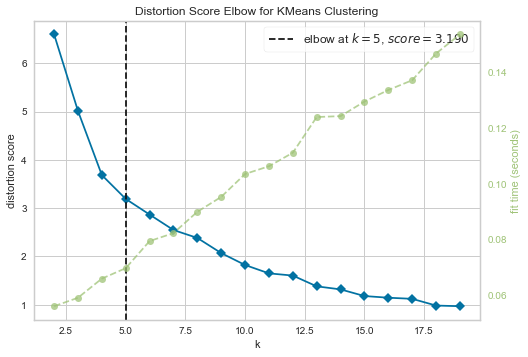

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
kmeans = KMeans() 
elbow = KElbowVisualizer(kmeans, k=(2,20)) 
elbow.fit(df) 
elbow.show()

In [ ]:
elbow.elbow_value_

##### Final Cluster'ların Oluşturulması

In [21]:
kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(df)

In [22]:
kmeans.n_clusters 

5

In [23]:
kmeans.cluster_centers_

array([[0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.23674699, 0.25719178, 0.79152542, 0.26356589],
       [0.37198795, 0.35416667, 0.51412429, 0.32235142],
       [0.83562823, 0.70645793, 0.37772397, 0.37172388],
       [0.11311914, 0.08523592, 0.29378531, 0.08182601]])

In [24]:
kmeans.labels_

array([3, 0, 0, 2, 0, 0, 1, 2, 0, 3, 1, 4, 0, 2, 4, 2, 2, 3, 4, 0, 1, 0,
       1, 3, 2, 2, 2, 0, 4, 1, 0, 0, 3, 4, 1, 2, 2, 1, 1, 3, 4, 3, 0, 1,
       4, 2, 1, 4, 4, 2])

In [25]:
df[0:5]

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512]])

In [26]:
# hangi eyalet hangi cluterda ? 

In [27]:
clusters = kmeans.labels_ 

In [28]:
df= pd.read_csv("C:/Users/tolga/OneDrive/Masaüstü/ML_YAZ_KAMPI/Machine Learning/ML part 2/datasets/USArrests.csv" , index_col=0)

In [29]:
# labelları dataframe içerisine gönderdik
df["cluster"] = clusters

In [30]:
df.head()

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,3
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,0


In [31]:
# 0 lar bizi rahatsız ederse 
df["cluster"] = df["cluster"] + 1

In [ ]:
df.head()

In [32]:
# 1 numaralı clusterda neler var
df[df["cluster"]==1]

,Murder,Assault,UrbanPop,Rape,cluster
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
California,9.0,276,91,40.6,1
Colorado,7.9,204,78,38.7,1
Florida,15.4,335,80,31.9,1
Illinois,10.4,249,83,24.0,1
Maryland,11.3,300,67,27.8,1
Michigan,12.1,255,74,35.1,1
Nevada,12.2,252,81,46.0,1
New Mexico,11.4,285,70,32.1,1


In [ ]:
# clusterları betimleyelim ne kadar sağlıklı bakalım 
df.groupby("cluster").agg(["count","mean","median"])

Dipnot : "murder" kritik olduğu için kendi içinde kümeleme yapabiliriz 12 ile 10 gibi 8 ile 7 gibi birleştirme yapabiliriz fakat en kritik olanı "mean" e bakılır 

In [33]:
 # csv olarak export etmek için 
df.to_csv("clusters.csv")

##### Hiyerarşik Kümeleme Analizi (Hierarchical Cluster Analysis)

Amaç : gözlemleri birbirine olan benzerliklerine göre alt kümelere ayırmaktır

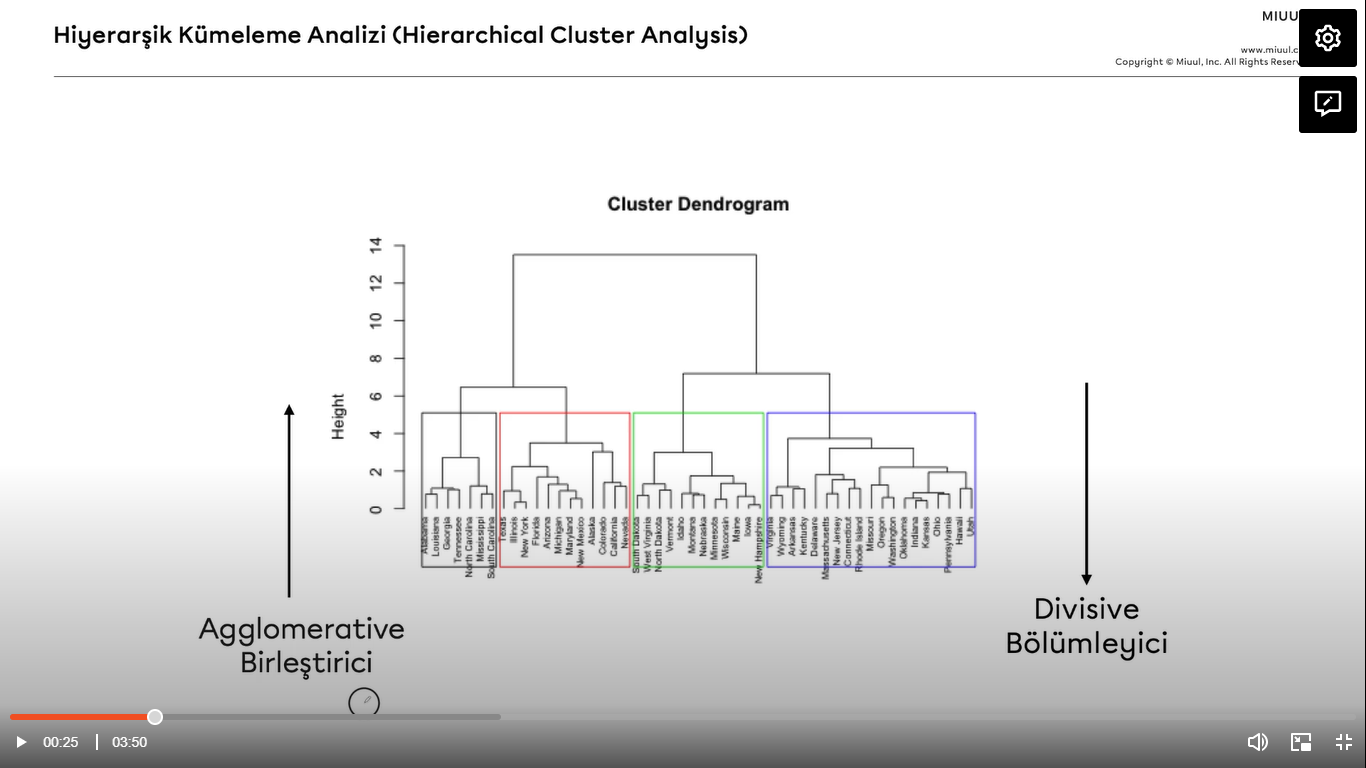

* Aggolomerative Birleştirici : en başta tüm gözlemler bir küme gibi düşünülüp yukarıya doğru 2 gözlem 3 gözlem bir araya gelerek yukarı doğru birleşerek bir küme oluşturur. 
* Divisive Bölümleyici : tüm gözlemler bir arada olduğunda ayrışarak aşağıya doğru her bir gözlem tek başına kalarak kümeleşir. 
* ikisinin de amacı benzerliklerine göre kümelere ayırmaktır. 

In [34]:
# uzaklık temelli yöntemler kullandığımız için standartlaştırmalıyız 

sc = MinMaxScaler((0,1)) 
df = sc.fit_transform(df)

In [35]:
# öklid e göre gözlem birimlerini kümelere ayırıyor,birbirine benzerlerine göre kümeliyor
hc_average = linkage(df,"average")

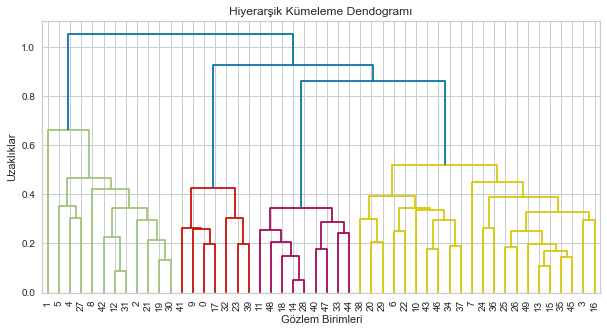

In [36]:
# dendogram adı verilen şema kullanılır yapısını görememiz açısından 

plt.figure(figsize=(10,5)) 
plt.title("Hiyerarşik Kümeleme Dendogramı") 
plt.xlabel("Gözlem Birimleri") 
plt.ylabel("Uzaklıklar") 
dendrogram(hc_average, 
          leaf_font_size=10) 

plt.show()

Sonuç: buradan kaç küme yapmak istediğimize karar verebiliriz.

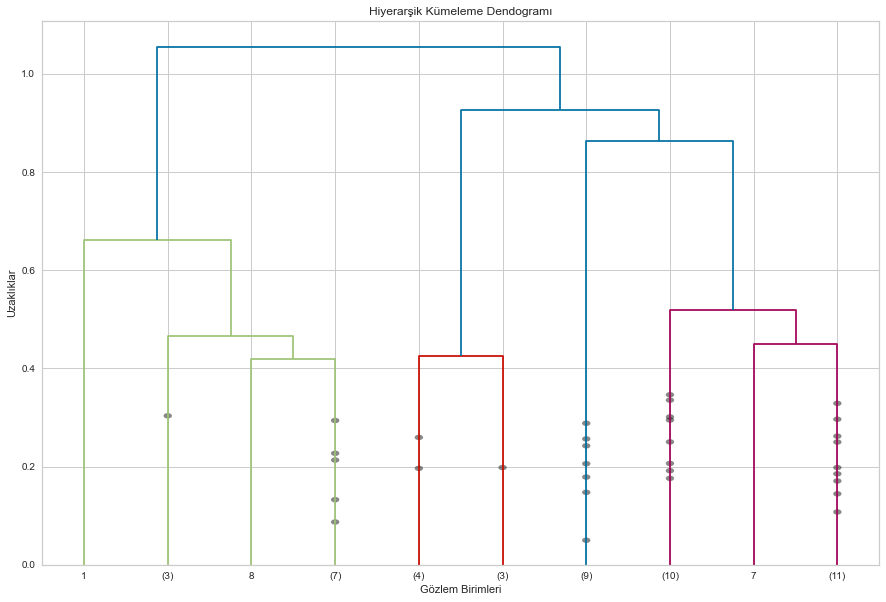

In [37]:
# kaç küme olsun onu göstermek için 

plt.figure(figsize=(15,10)) 
plt.title("Hiyerarşik Kümeleme Dendogramı") 
plt.xlabel("Gözlem Birimleri") 
plt.ylabel("Uzaklıklar") 
dendrogram(hc_average, 
          truncate_mode="lastp", 
          p=10, 
          show_contracted=True, 
          leaf_font_size=10) 

plt.show()

In [38]:
# avantajı : bize resme genelden bakma şansı tanımaktadır.

#### Küme Sayısını Belirlemek

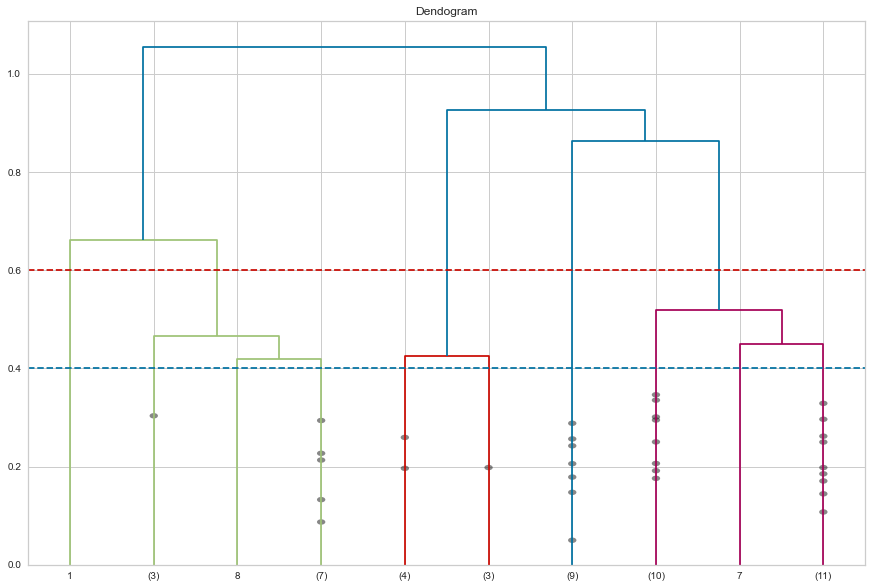

In [39]:
# programatik olarak çizmek 
# çizgi belirleme nereden koyacağız
plt.figure(figsize=(15,10)) 
plt.title("Dendogram") 
dend = dendrogram(hc_average, 
          truncate_mode="lastp", 
          p=10, 
          show_contracted=True, 
          leaf_font_size=10) 
plt.axhline(y=0.6,color='r',linestyle='--') 
plt.axhline(y=0.4,color='b',linestyle='--') 
plt.show()

##### Final Modeli 

In [40]:
# hangi gözlem biriminin hangi sınıfta olmasını vermemiz gerekiyor 

from sklearn.cluster import AgglomerativeClustering 


In [41]:
cluster = AgglomerativeClustering(n_clusters=7,linkage="average")

In [42]:
clusters = cluster.fit_predict(df)

In [43]:
clusters

array([2, 4, 1, 0, 6, 6, 5, 0, 1, 2, 5, 3, 1, 0, 3, 0, 0, 2, 3, 1, 5, 1,
       5, 2, 0, 0, 0, 6, 3, 5, 1, 1, 2, 3, 5, 0, 0, 5, 5, 2, 3, 2, 1, 5,
       3, 0, 5, 3, 3, 0], dtype=int64)

In [44]:
# dataframe içerisine cluster ları ekleyeceğiz 

df = pd.read_csv("C:/Users/tolga/OneDrive/Masaüstü/ML_YAZ_KAMPI/Machine Learning/ML part 2/datasets/USArrests.csv" , index_col=0)

In [45]:
cluster_kmeans = kmeans.labels_

In [46]:
df["hi_cluster_no"] = clusters

In [47]:
df["hi_cluster_no"] = df["hi_cluster_no"] + 1

In [48]:
# oluşturduğumuz kmeansları dataframe içerisine yükleyelim

df["kmeans_cluster_no"] = cluster_kmeans


In [49]:
df

,Murder,Assault,UrbanPop,Rape,hi_cluster_no,kmeans_cluster_no
Alabama,13.2,236,58,21.2,3,3
Alaska,10.0,263,48,44.5,5,0
Arizona,8.1,294,80,31.0,2,0
Arkansas,8.8,190,50,19.5,1,2
California,9.0,276,91,40.6,7,0
Colorado,7.9,204,78,38.7,7,0
Connecticut,3.3,110,77,11.1,6,1
Delaware,5.9,238,72,15.8,1,2
Florida,15.4,335,80,31.9,2,0
Georgia,17.4,211,60,25.8,3,3


In [50]:
df["kmeans_cluster_no"] = df["kmeans_cluster_no"] + 1

In [51]:
df

,Murder,Assault,UrbanPop,Rape,hi_cluster_no,kmeans_cluster_no
Alabama,13.2,236,58,21.2,3,4
Alaska,10.0,263,48,44.5,5,1
Arizona,8.1,294,80,31.0,2,1
Arkansas,8.8,190,50,19.5,1,3
California,9.0,276,91,40.6,7,1
Colorado,7.9,204,78,38.7,7,1
Connecticut,3.3,110,77,11.1,6,2
Delaware,5.9,238,72,15.8,1,3
Florida,15.4,335,80,31.9,2,1
Georgia,17.4,211,60,25.8,3,4


In [52]:
# hiyerarşik kümelemede 2 , kmeanste 2 olanlar neler ?
# hiyerarşik kümelemede 4,  kmeanste 4 olanlar nelerdir ? 
# bu kesişim dışındakiler nereden geliyor ve neden bir arada değil ? 

##### Temel Bileşen Analizi

Nedir ? 
* Temel fikir,çok değişkenli verinin ana özelliklerini daha az sayıda değişken / bileşen ile temsil etmektir. 
* Diğer bir ifade ile ; 
* küçük miktarda bir bilgi kaybını göze alıp değişken boyutunu azaltmaktır.

* 100 değişkeni 3 değişkene indirme çabasıdır, bilgiden fedakarlık yapmaktır. 
* Nedeni ise çoklu doğrusal regresyon modelinden kurtulmak istiyor olabiliriz,resimlere filtre yapmak istiyor olabiliriz gürültü azaltma amaçlı 
* Ne yapar(mülakat sorusu) ? -> temel bileşen analizi bir boyut indirgeme yaklaşımıdır, veri setinin boyutunun küçük miktarda kaybı göze alarak indirgeme işlemidir. 
* bağımsızdır,kolerasyonsuzdur,ilişkisizdir.
* boyut indirger

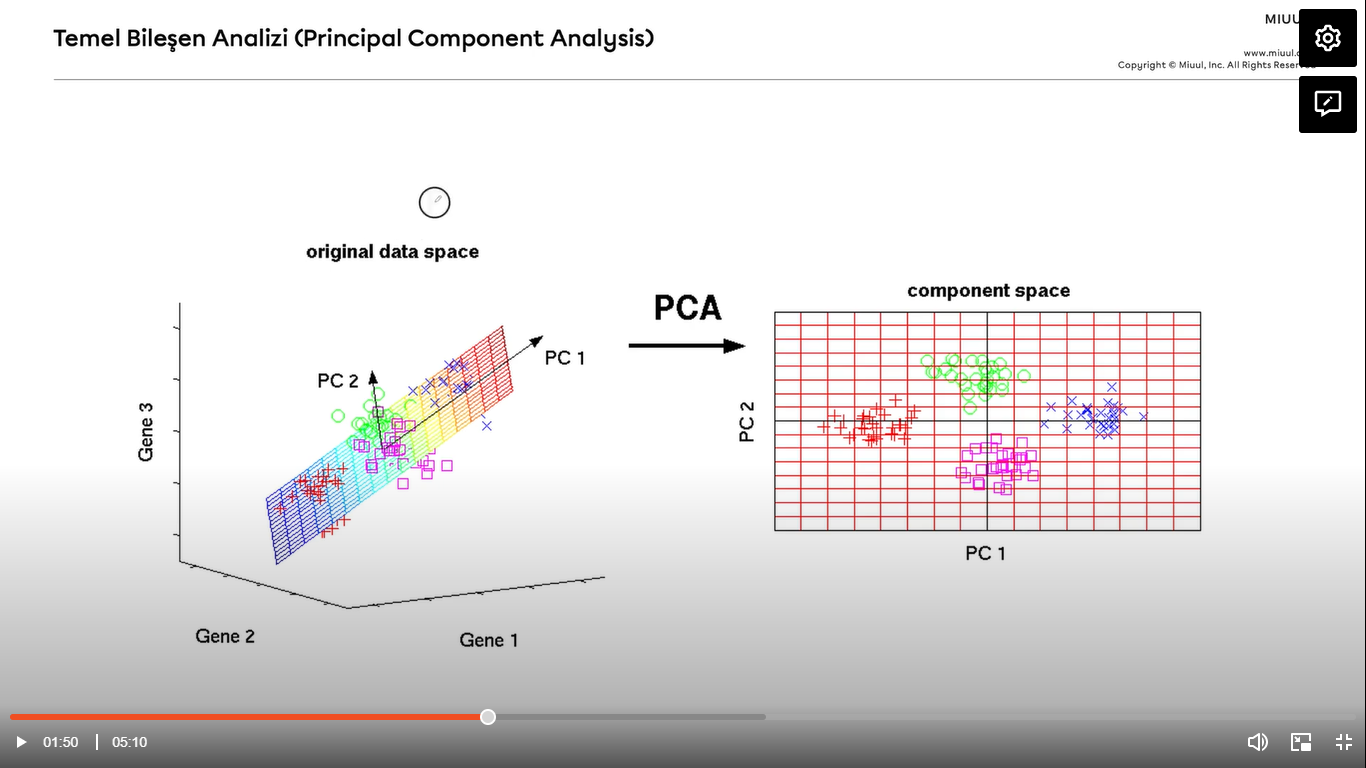

In [54]:
df = pd.read_csv("C:/Users/tolga/OneDrive/Masaüstü/ML_YAZ_KAMPI/Machine Learning/ML part 2/datasets/Hitters.csv")

In [5]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [6]:
num_cols = [col for col in df.columns if df[col].dtypes  in ["int64","float"] and "Salary" not in col]

In [7]:
num_cols

['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'Errors']

In [8]:
df[num_cols].head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4


In [9]:
df = df[num_cols]

In [11]:
df.dropna(inplace=True)

C:\Users\tolga\AppData\Local\Temp\ipykernel_20008\1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [12]:
df.shape

(322, 16)

In [13]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4


In [14]:
# standartlaştırma 
df = StandardScaler().fit_transform(df)

In [15]:
# 16 değişkeni 2-3 bileşene indirgemeye çalışacağız
# varyanslara göre değerlendirilecek 
pca = PCA() 
pca_fit = pca.fit_transform(df)

In [16]:
pca.explained_variance_ratio_

array([4.60378552e-01, 2.60398491e-01, 1.03388605e-01, 5.36902121e-02,
       4.20784091e-02, 2.96359092e-02, 1.57079101e-02, 1.13928108e-02,
       7.83230398e-03, 5.87669497e-03, 3.74765194e-03, 3.09384056e-03,
       1.55679403e-03, 8.59034766e-04, 2.86873704e-04, 7.59064046e-05])

In [17]:
# cumulative varyanslar 
# peş peşe iki bileşenin açıklayacak olduğu varyans nedir ? 
np.cumsum(pca.explained_variance_ratio_)

array([0.46037855, 0.72077704, 0.82416565, 0.87785586, 0.91993427,
       0.94957018, 0.96527809, 0.9766709 , 0.9845032 , 0.9903799 ,
       0.99412755, 0.99722139, 0.99877819, 0.99963722, 0.99992409,
       1.        ])

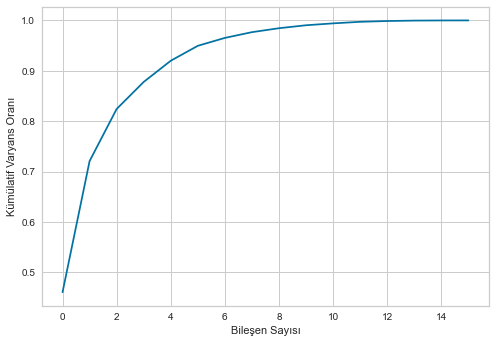

In [18]:
# bu bileşeni kaça indirgeyeceğiz elbow ile 
# optimum bileşen sayısı 

pca = PCA().fit(df) 
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel("Bileşen Sayısı") 
plt.ylabel("Kümülatif Varyans Oranı") 
plt.show()

In [19]:
#final PCA oluştur 

pca = PCA(n_components=3)  
pca_fit = pca.fit_transform(df)

In [20]:
pca.explained_variance_ratio_

array([0.46037855, 0.26039849, 0.1033886 ])

In [21]:
# 3 nün toplam ne kadar varyans açıkladığını görmek için ,toplam ne kadar bilgi veriyor
np.cumsum(pca.explained_variance_ratio_)

array([0.46037855, 0.72077704, 0.82416565])

##### Bonus : Principal Component Regression

In [22]:
#yukarıdakileri neden kullandığımızı anlamak için

df.shape

(322, 16)

In [24]:
len(pca_fit)

322

In [29]:
# kaç numeric değer var 
len(num_cols)

16

In [26]:
# numerici 3 e indirgemiştik

In [56]:
# num_cols dışındakileri getir dersek 
others = [col for col in df.columns if col not in num_cols] 
others

['League', 'Division', 'Salary', 'NewLeague']

In [35]:
pd.DataFrame(pca_fit, columns=["PC1","PC2","PC3"]).head()

,PC1,PC2,PC3
0,-3.240106,-0.253173,0.776066
1,0.245488,1.302951,0.118040
2,0.603883,-2.617002,-0.698183
3,3.591276,0.547821,-1.049022
4,-2.264528,-0.698898,-1.290536


In [57]:
df[others].head()

,League,Division,Salary,NewLeague
0,A,E,NaN,A
1,N,W,475.0,N
2,A,W,480.0,A
3,N,E,500.0,N
4,N,E,91.5,N


 Pcr yöntemi :
 önce temel bir değişken uygulanıp değişkenlerin boyutu indirgeniyor daha sonra bu bileşenlerin üstüne regresyon uygulanıyor 

In [59]:
#bir liste içerisinde ikisini beraber ver 

final_df = pd.concat([pd.DataFrame(pca_fit, columns=["PC1","PC2","PC3"]), 
                      df[others]],axis=1)

In [61]:
final_df.head()

,PC1,PC2,PC3,League,Division,Salary,NewLeague
0,-3.240106,-0.253173,0.776066,A,E,NaN,A
1,0.245488,1.302951,0.118040,N,W,475.0,N
2,0.603883,-2.617002,-0.698183,A,W,480.0,A
3,3.591276,0.547821,-1.049022,N,E,500.0,N
4,-2.264528,-0.698898,-1.290536,N,E,91.5,N


In [89]:
# indirgedik model kuralım ve decision_tree yapalım 

from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split,GridSearchCV

In [65]:
# kategorik değişkenlere -> labelencoder, getdummies ve onehot encoder kullanabiliriz   

def label_encoder(dataframe, binary_col): 
    label_encoder = LabelEncoder() 
    dataframe[binary_col] = label_encoder.fit_transform(dataframe[binary_col]) 
    return dataframe

In [66]:
for col in ["NewLeague","Division","League"]: 
    label_encoder(final_df,col)

In [68]:
final_df.head()

,PC1,PC2,PC3,League,Division,Salary,NewLeague
0,-3.240106,-0.253173,0.776066,0,0,NaN,0
1,0.245488,1.302951,0.118040,1,1,475.0,1
2,0.603883,-2.617002,-0.698183,0,1,480.0,0
3,3.591276,0.547821,-1.049022,1,0,500.0,1
4,-2.264528,-0.698898,-1.290536,1,0,91.5,1


In [69]:
# NA lerden kurtulalım
final_df.dropna(inplace=True)

In [71]:
final_df.head()

,PC1,PC2,PC3,League,Division,Salary,NewLeague
1,0.245488,1.302951,0.118040,1,1,475.0,1
2,0.603883,-2.617002,-0.698183,0,1,480.0,0
3,3.591276,0.547821,-1.049022,1,0,500.0,1
4,-2.264528,-0.698898,-1.290536,1,0,91.5,1
5,1.229535,-1.825093,3.659220,0,1,750.0,0


In [73]:
# y= bağımlı -> salary others-> bağımsız 
y = final_df["Salary"] 
X = final_df.drop(["Salary"],axis = 1)

In [74]:
X

,PC1,PC2,PC3,League,Division,NewLeague
1,0.245488,1.302951,0.118040,1,1,1
2,0.603883,-2.617002,-0.698183,0,1,0
3,3.591276,0.547821,-1.049022,1,0,1
4,-2.264528,-0.698898,-1.290536,1,0,1
5,1.229535,-1.825093,3.659220,0,1,0
...,...,...,...,...,...,...
317,-0.089503,-0.521050,-0.770721,1,0,1
318,3.339811,-0.732713,3.114194,0,0,0
319,-0.951442,-0.910086,0.286517,0,1,0
320,2.091473,-2.265826,-0.192745,0,0,0


In [75]:
y

1       475.0
2       480.0
3       500.0
4        91.5
5       750.0
        ...  
317     700.0
318     875.0
319     385.0
320     960.0
321    1000.0
Name: Salary, Length: 263, dtype: float64

In [79]:
# linear regression with use 5k çapraz doğrulama 
lm = LinearRegression() 
rmse = np.mean(np.sqrt(-cross_val_score(lm,X,y,cv=5,scoring="neg_mean_squared_error"))) 

In [80]:
rmse

345.6021106351968

In [81]:
# doğru yoldayız yanlış mı ? ortalamaya bakalım 
y.mean()

535.9258821292775

In [85]:
#cart 
cart = DecisionTreeRegressor()
rmse = np.mean(np.sqrt(-cross_val_score(cart,X,y,cv=5,scoring="neg_mean_squared_error"))) 

In [86]:
rmse

383.8226885228265

In [84]:
y.mean()

535.9258821292775

In [101]:
# hiperparametre optimizasyonu 
# gridsearchCV 

cart = DecisionTreeRegressor()
rmse = np.mean(np.sqrt(-cross_val_score(cart, X, y, cv=5, scoring="neg_mean_squared_error")))

cart_params = {'max_depth': range(1, 11),
               "min_samples_split": range(2, 20)}

# GridSearchCV
cart_best_grid = GridSearchCV(cart,
                              cart_params,
                              cv=5,
                              n_jobs=-1,
                              verbose=True).fit(X, y)

cart_final = DecisionTreeRegressor(**cart_best_grid.best_params_, random_state=17).fit(X, y)

rmse = np.mean(np.sqrt(-cross_val_score(cart_final, X, y, cv=5, scoring="neg_mean_squared_error")))

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [102]:
rmse

330.1964109339104

In [99]:
# mülakat sorusu ; 
# elimde bir veri seti var ve veri setinde "label yok!" ama sınıflandırma problemi çözmek istiyorum nasıl olacak ? 
# önce unsupervised ile clusterlara label muamelesi yaparım ve  sınıflandırma yaparım, sonrasında ise buradan bir supervised çıkarabiliriz.

In [103]:
y.mean()

535.9258821292775

##### Bonus : PCA ile Çok Boyutlu Veriyi 2 Boyutta Görselleştirme

Best Cancer 

In [105]:
pd.set_option('display.max_columns',None) 
pd.set_option('display.width',500) 

In [106]:
df = pd.read_csv("C:/Users/tolga/OneDrive/Masaüstü/ML_YAZ_KAMPI/Machine Learning/ML part 2/datasets/breast_cancer.csv")

In [107]:
y = df["diagnosis"] 
X = df.drop(["diagnosis","id"],axis=1)

In [108]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [109]:
# 2 eksen üzerinde görselleştirelim/ 2 boyutta 
# bağımlı değişken "iyi huylu ve kötü huylu"  

# veri setini 2 boyuta indirgeyelim 
# bağımlı değişkeni standartlaştır 
# PCA hesabı yap 
# değişkenleri dönüştürmüş olacak 
# dataframe çevirecek 

def create_pca_df(X,y): 
    X = StandardScaler().fit_transform(X) 
    pca = PCA(n_components=2) 
    pca_fit = pca.fit_transform(X) 
    pca_df  = pd.DataFrame(data=pca_fit,columns=['PC1','PC2']) 
    final_df = pd.concat([pca_df,pd.DataFrame(y)],axis=1) 
    return final_df

In [110]:
pca_df = create_pca_df(X,y)

In [111]:
pca_df

,PC1,PC2,diagnosis
0,9.192837,1.948583,M
1,2.387802,-3.768172,M
2,5.733896,-1.075174,M
3,7.122953,10.275589,M
4,3.935302,-1.948072,M
...,...,...,...
564,6.439315,-3.576817,M
565,3.793382,-3.584048,M
566,1.256179,-1.902297,M
567,10.374794,1.672010,M


In [112]:
df.shape

(569, 32)

In [113]:
import random

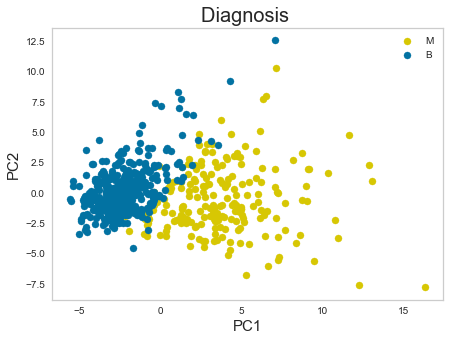

In [114]:
# görselleştirme 

def plot_pca(dataframe, target):
    fig = plt.figure(figsize=(7, 5))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel('PC1', fontsize=15)
    ax.set_ylabel('PC2', fontsize=15)
    ax.set_title(f'{target.capitalize()} ', fontsize=20)

    targets = list(dataframe[target].unique())
    colors = random.sample(['r', 'b',"g","y"], len(targets))

    for t, color in zip(targets, colors):
        indices = dataframe[target] == t
        ax.scatter(dataframe.loc[indices, 'PC1'], dataframe.loc[indices, 'PC2'], c=color, s=50)
    ax.legend(targets)
    ax.grid()
    plt.show()

plot_pca(pca_df, "diagnosis")

In [115]:
# genellenebilirliği yüksek bir veri seti 
# başka bir veri setinde görelim "taç yaprak ve çanak yaprak "
# IRIS 

In [116]:
import seaborn as sns 
df  = sns.load_dataset("iris") 

In [117]:
# bütün ihtiyaçlar için görselleştirme fonksiyonu kullanabilir fakat öncesinde "X" ve "y" in sayısal değişkene dönüşmesi gerekmektedir.
y = df["species"] 
X = df.drop(["species"],axis=1)

In [118]:
pca_df = create_pca_df(X,y) 

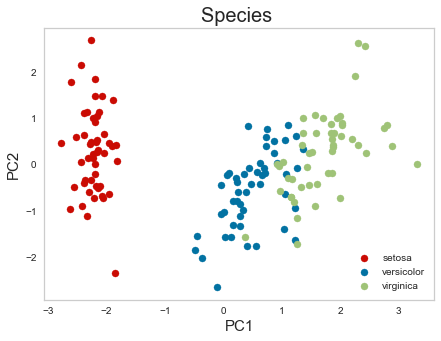

In [119]:
# sadece fonksiyonları çağırarak yapabiliriz  
# unique leri çıkardıktan sonra elimizde 3 sınıf kalıyor fakat 2 renk veriyor bize  
plot_pca(pca_df, "species")

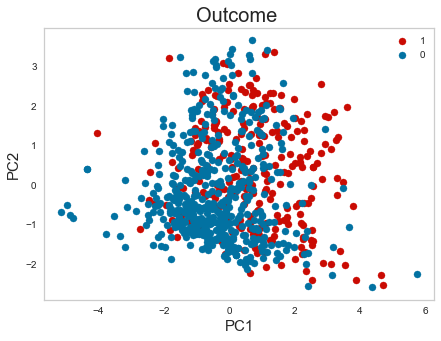

In [135]:
df = pd.read_csv("C:/Users/tolga/OneDrive/Masaüstü/ML_YAZ_KAMPI/Machine Learning/datasets/diabetes.csv")

y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

pca_df = create_pca_df(X, y)

plot_pca(pca_df, "Outcome")